<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [4]:
import os
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.resnet50 import preprocess_input

import matplotlib.pyplot as plt
%matplotlib inline 

from PIL import Image

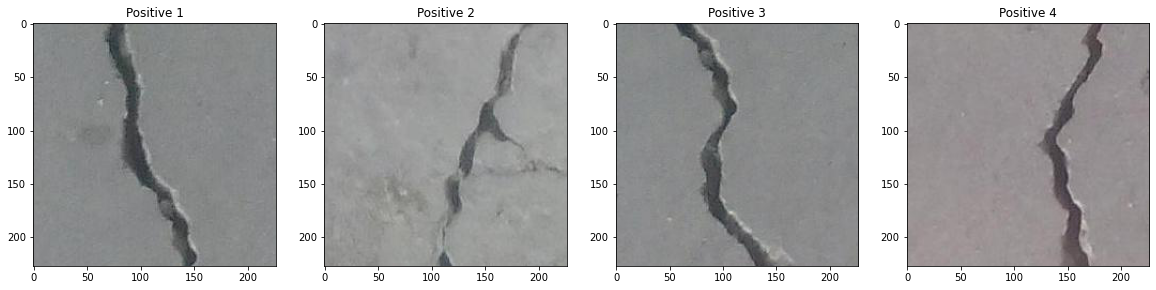

In [8]:
positive_mages_dir=[]

for el in sorted(os.listdir('./concrete_data_week2/Positive')):
    positive_mages_dir.append(f'./concrete_data_week2./Positive/{el}')

# positive_mages_dir

fig, axes = plt.subplots(1,4,sharey=False,sharex=True)
fig.set_figheight(10)
fig.set_figwidth(20)

for i,img in enumerate(positive_mages_dir[:4]):
    im = Image.open(img)
    
    _=axes[i].imshow(im)
    _=axes[i].set_title(f'Positive {i+1}')

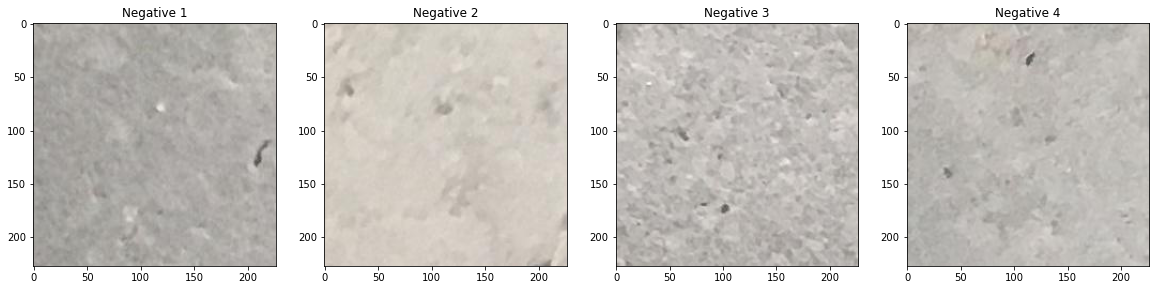

In [10]:
negative_mages_dir=[]

for el in sorted(os.listdir('./concrete_data_week2/Negative')):
    negative_mages_dir.append(f'./concrete_data_week2./Negative/{el}')


fig, axes = plt.subplots(1,4,sharey=False,sharex=True)
fig.set_figheight(10)
fig.set_figwidth(20)

for i,img in enumerate(negative_mages_dir[:4]):
    im = Image.open(img)
    
    _=axes[i].imshow(im)
    _=axes[i].set_title(f'Negative {i+1}')

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [3]:
os.chdir('./concrete_data_week4')
os.listdir()

['.DS_Store', 'classifier_VGG16_model.h5', 'test', 'train', 'valid']

In [4]:
batch_size=100
img_size=224
num_classes=2
train_path='./train'
valid_path='./valid'
test_path='./test'

image_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

Creating Data Loaders

In [5]:
train_loader = image_generator.flow_from_directory(directory=train_path,
                                                   target_size=(img_size,img_size),
                                                   class_mode='categorical',
                                                   batch_size=batch_size
                                                   )      

valid_loader = image_generator.flow_from_directory(directory=valid_path,
                                                   target_size=(img_size,img_size),
                                                   class_mode='categorical',
                                                   batch_size=batch_size
                                                   )    

test_loader = image_generator.flow_from_directory(directory=test_path,
                                                   target_size=(img_size,img_size),
                                                   class_mode='categorical',
                                                   batch_size=batch_size
                                                   )   

Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Building a model

In [16]:
model=Sequential()

model.add(vgg16.VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

model.add(Dense(num_classes,activation='softmax'))



model.layers[0].trainable=False

model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


Training a Model

In [17]:
steps_per_epoch_training = len(train_loader)
steps_per_epoch_validation = len(valid_loader)
num_epochs = 2

fit_history = model.fit(
    train_loader,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_loader,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2
301/301 [==============================] - 2346s 8s/step - loss: 0.1375 - accuracy: 0.9495 - val_loss: 0.0337 - val_accuracy: 0.9931
Epoch 2/2
301/301 [==============================] - 2343s 8s/step - loss: 0.0245 - accuracy: 0.9944 - val_loss: 0.0188 - val_accuracy: 0.9953


In [18]:
model.save('classifier_VGG16_model.h5')

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [6]:
model_VGG16 = keras.models.load_model('classifier_resnet_model.h5')
model_REsNet50 = keras.models.load_model('classifier_VGG16_model.h5')

In [7]:
model_VGG16.evaluate(test_loader)

5/5 [==============================] - 41s 8s/step - loss: 0.0023 - accuracy: 1.0000


[0.002334761433303356, 1.0]

In [8]:
model_REsNet50.evaluate(test_loader)

5/5 [==============================] - 64s 13s/step - loss: 0.0161 - accuracy: 0.9980


[0.016107236966490746, 0.9980000257492065]

<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [9]:
import numpy as np

class_names = sorted(['Negative','positive'])

In [11]:
VGG_preds=model_VGG16.predict(test_loader)
VGG_preds=np.argmax(VGG_preds,axis=-1)

In [12]:
predicted_classes=np.array([class_names[ypred] for ypred in VGG_preds])
predicted_classes

array(['Negative', 'positive', 'positive', 'Negative', 'positive',
       'positive', 'positive', 'positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'positive', 'Negative',
       'Negative', 'Negative', 'positive', 'positive', 'positive',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'Negative', 'positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'positive', 'Negative',
       'Negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'Negative', 'Negative', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'positive', 'positive', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'Negati

In [13]:
resnet_preds=model_REsNet50.predict(test_loader)
resnet_preds=np.argmax(resnet_preds,axis=-1)

In [14]:
predicted_classes=np.array([class_names[ypred] for ypred in resnet_preds])
predicted_classes

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'Negative', 'positive', 'positive', 'positive', 'Negative',
       'Negative', 'positive', 'Negative', 'positive', 'Negative',
       'Negative', 'positive', 'positive', 'Negative', 'Negative',
       'Negative', 'positive', 'positive', 'Negative', 'Negative',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'positive', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'Negative',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'positive', 'Negati

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).